In [9]:
import torch
from torch.nn import functional as F
from config import *
from encoder import Encoder
from modules import LLM

In [10]:
def get_loss_lr(log_file):
    with open(log_file) as f:
        lines = f.readlines()

    losses = []
    lrs = []
    for line in lines:
        step = int(line.split()[0][4:-1])
        loss = float(line.split()[1][5:])
        lr = float(line.split()[3][3:])
        if len(losses) > step - 1:
            losses[step - 1] = loss
            lrs[step - 1] = lr
        else:
            losses.append(loss)
            lrs.append(lr)
    return losses, lrs

In [11]:
import matplotlib.pyplot as plt

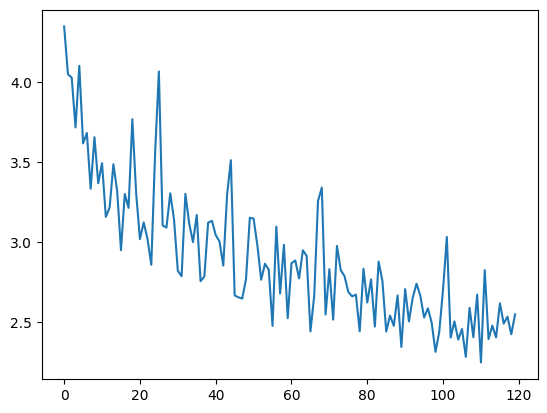

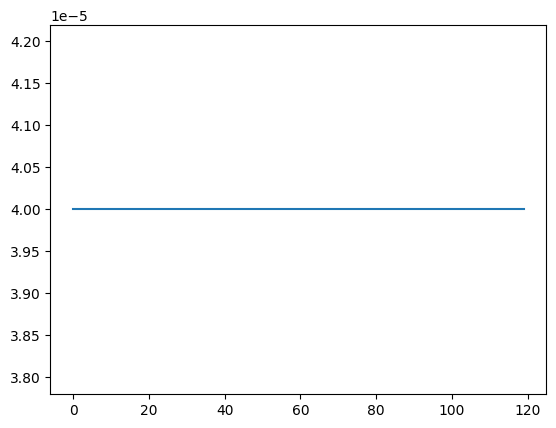

In [12]:
losses, lrs = get_loss_lr("losses.log")
plt.plot(losses)
plt.show()
plt.plot(lrs)
plt.show()

In [5]:
from dataloader import BinaryDataset, collate_fn, collate_fn_with_instruction_mask
from torch.utils.data import DataLoader

loader = DataLoader(
    BinaryDataset("alpaca-chinese-52k.json.bin", MAX_LENGTH),
    batch_size=1,
    shuffle=False,
    num_workers=1,
    collate_fn=collate_fn_with_instruction_mask
)
encoder = Encoder.from_path("encoder.json")

In [6]:
llm = LLM(encoder.vocab_size, MODEL_DIM, MAX_LENGTH, N_HEADS, N_BLOCKS, 0).to("cuda")
sd = torch.load("llm1180_finetune_state_dict_0.9689470045268536.pt")
llm.load_state_dict(sd)
llm = torch.compile(llm)

/tmp/ipykernel_299101/1029780934.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load("llm1180_finetune_state_dict_0.9689470045268536.pt")


In [7]:
length = MAX_LENGTH
for x, y, mask, n_tokens in loader:
    x = F.pad(x.to("cuda")[:, :length, ...], (MAX_LENGTH - length, 0), value=0)
    y = F.pad(y.to("cuda")[:, :length, ...], (MAX_LENGTH - length, 0), value=0)
    break

In [8]:
torch.set_float32_matmul_precision('high')
logits = llm(x)
F.cross_entropy(logits.contiguous().view(-1, logits.size(-1)), y.contiguous().view(-1), reduction='mean', ignore_index=0)

tensor(3.1188, device='cuda:0', grad_fn=<NllLossBackward0>)

In [9]:
out = logits[0].argmax(dim=-1).tolist()[MAX_LENGTH - length:]
print(encoder.decode(x[0].tolist()))
print(encoder.decode(y[0].tolist()))
print(encoder.decode(out))

<ins>给出保持健康的三个建议。
</ins>1.均衡饮食，确保多吃水果和蔬菜。
2.定期锻炼，保持身体活跃和强壮。
3.获得充足的睡眠并保持一致的睡眠时间表。<eos>
给出保持健康的三个建议。
</ins>1.均衡饮食，确保多吃水果和蔬菜。
2.定期锻炼，保持身体活跃和强壮。
3.获得充足的睡眠并保持一致的睡眠时间表。<eos>
<eos>你了险不康的饮个标议： 
1. 衡饮食：如保每样蔬果：蔬菜。

.避期去炼，以持健体健力。精壮。
3.避得充足的睡眠，保持充定。生眠。间。。
2成：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：：）））））SSSS希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希希人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人希希人人人人人人人人人人人人人人人人人希希人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人希人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人希希希希希人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人人